In [1]:
from google.colab import userdata
from google.colab import auth

# Authenticate user for Google Cloud (Vertex AI) access
auth.authenticate_user()

GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')
GOOGLE_CLOUD_PROJECT=userdata.get('GOOGLE_CLOUD_PROJECT')

In [2]:
# Install Libraries
!pip install -U langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
      Successfully uninstalled google-auth-2.43.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
  Attempting uninstall: google-genai
    Found existing installation: google-genai 1.55.0
    Uninstalling google-genai-1.55.0:
      Successfully uninstalled google-genai-1.55.0
ERROR: pip's dependency resolver does not currently take into ac

In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

In [4]:
model = ChatGoogleGenerativeAI(
    model="gemini-3-pro-preview",
    project=GOOGLE_CLOUD_PROJECT,
    location="global",
    temperature=1.0,
)

In [5]:
# Create a State
class LLMState(TypedDict):
    question: str
    answer: str

In [6]:
def llm_qa(state: LLMState) -> LLMState:
    # we have to extarct question from the state
    question = state["question"]

    # form a prompt
    prompt = f"""
    Answer the question: {question}
    """

    # then ask qtn to the LLM
    answer  = model.invoke(prompt).content

    # once done, update the answer in the state
    state['answer'] = answer
    return state

In [7]:
# Create a Graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node("llm_qa", llm_qa)

# add edges
graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)

# compile a graph
workflow = graph.compile()
print("Graph compiled successfully.")

Graph compiled successfully.


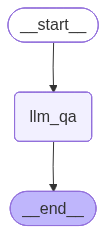

In [8]:
# Visualize/Display the graph
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception as e:
    # Fallback to printing the mermaid graph as text if image rendering fails
    print(workflow.get_graph().draw_mermaid())

In [9]:
# Execute
from IPython.display import display, Markdown

initial_state = {"question":"what are AI trends in industry right now"}
final_state = workflow.invoke(initial_state)

answer = print(final_state)
# answer = print(final_state['answer'])

{'question': 'what are AI trends in industry right now', 'answer': [{'type': 'text', 'text': 'As of mid-2024, the artificial intelligence landscape in industry has shifted from the "shock and awe" phase of 2023 (chatbots and image generators) to the **"operationalization and ROI" phase.** Companies are no longer asking "What is this?" but rather "How do we integrate this securely to make money?"\n\nHere are the critical AI trends in industry right now:\n\n### 1. The Rise of Small Language Models (SLMs)\nWhile massive models like GPT-4 occupy the headlines, industry is pivoting toward SLMs (like Microsoft’s Phi-3, Google’s Gemma, or Mistral).\n*   **Why:** Huge models are expensive to run, slow, and energy-hungry.\n*   **The Trend:** Enterprises are deploying smaller, highly fine-tuned models that run locally or more cheaply in the cloud. They are "good enough" for specific tasks (like summarizing internal meetings or coding) without the massive overhead of a trillion-parameter model.\n